In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.__version__

'1.13.1'

In [0]:
tf.reset_default_graph()

In [0]:
width = 100
height = 100

inicjalizacja neuronów wyjściowych (zmienna)

In [0]:
#do przywrócenia 24
weights_last_iter = tf.placeholder(dtype=tf.float32)
weights = tf.Variable(np.random.rand(width, height, 3), dtype=tf.float32)
weights_assigned = weights.assign(weights_last_iter)

Instructions for updating:
Colocations handled automatically by placer.


*   liczymy dystans 
*   wszystkie dane w <0,1>

In [0]:
input_data = tf.placeholder(tf.float32, name="input_data")
dist = (tf.math.reduce_sum((input_data - weights)**2, axis = -1))**(1/2)

In [0]:
#!pip install tensorboardcolab

In [0]:
# from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

# tbc=TensorBoardColab()

In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [0]:
#do ewentualnego wyrzucenia po zakończeniu
#out = sess.run(dist, feed_dict = {input_data: np.full((width, height, 24), 1)})
#print(out)

In [0]:
#plt.matshow(out)
#plt.show()

indeks o najmniejszej odległości

In [0]:
# wins = tf.math.top_k(-dist)
# wins_all = tf.argmax(wins[0])
# winner = wins[1][wins_all[0]]
# sess.run((dist[wins_all[0]][winner[0]], wins_all[0], winner[0]), feed_dict = {input_data: np.full((width, height, 24), 1)})

In [0]:
test_win = tf.math.reduce_min(dist)
winner_cor = tf.dtypes.cast(tf.where(tf.equal(dist, tf.math.reduce_min(dist))), tf.float32)
#sess.run((test_win, winner_cor), feed_dict = {input_data: np.full((width, height, 24), 1)})

In [0]:
cors_tf = tf.constant(np.indices((width, height)), dtype=tf.float32)
cors_tf = tf.transpose(cors_tf, [1,2,0])

diff_tf = cors_tf - (winner_cor[0])

distance_tf_squared = tf.math.reduce_sum((diff_tf)**2, axis = -1)
distance_tf = (distance_tf_squared)**(1/2)

#cors_matrix, dist_matrix, winner_matrix = sess.run((cors_tf, distance_tf, winner_cor[0]), feed_dict = {input_data: np.full((width, height, 24), 1)})


In [0]:
# plt.matshow(out)
# plt.matshow(dist_matrix)

sigma_t

In [0]:
#numer iteracji t
t = tf.placeholder(dtype = tf.float32)

#wyjściowa wartość
sigma0 = tf.placeholder(dtype = tf.float32)
time_const = tf.placeholder(dtype = tf.float32)

sigma_t = sigma0 * tf.math.exp(-(t/time_const))

funkcje sąsiedztwa

In [0]:
theta_t = tf.math.exp(-(distance_tf_squared)/(2*sigma_t**2))
theta_t = tf.dtypes.cast(tf.expand_dims(theta_t, -1), tf.float32)

#sess.run(theta_t, feed_dict = {input_data: learning_data[np.random.randint(0,3)], t: [initial_t]})

In [0]:
#theta_matrix = sess.run(theta_t, feed_dict = {input_data: np.full((width, height, 24), 1), t: [10]})
# print(theta_matrix)
# plt.matshow(theta_matrix)

learning rate

In [0]:
L0 = tf.placeholder(dtype=tf.float32)
learning_rate = L0 * tf.math.exp(-(t/time_const))
#sess.run(learning_rate, feed_dict = {input_data: learning_data[np.random.randint(0,3)], t: [initial_t]})

In [0]:
#sess.run(weights, feed_dict = {input_data: learning_data[np.random.randint(0,3)], t: [initial_t]})

zmiana wag

In [0]:
weights_updated = weights + theta_t*learning_rate*(input_data - weights)
#sess.run(weights, feed_dict = {input_data: learning_data[np.random.randint(0,3)], t: [initial_t]})

uczenie

In [0]:
from PIL import Image

In [0]:
#hyperparameters - nie ulegają uczeniu, ustalamy sami stałe

L0_value = 0.5
sigma0_value = 50
time_const_val = 4000
learning_data = np.random.rand(9, 3)

(100, 100, 3) (100, 100) [0.4757336] 0.51330924


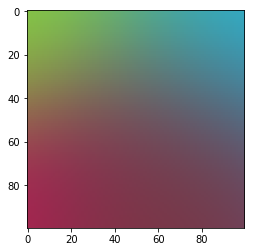

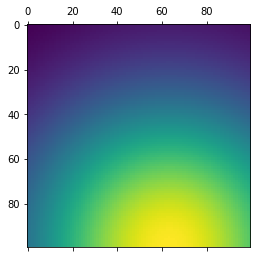

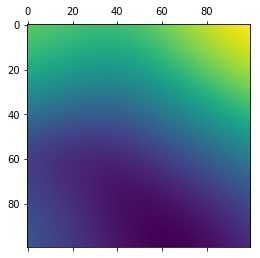

(100, 100, 3) (100, 100) [0.45264494] 0.69235253


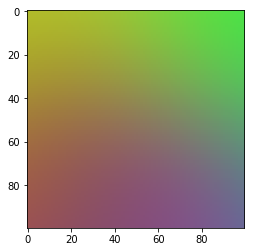

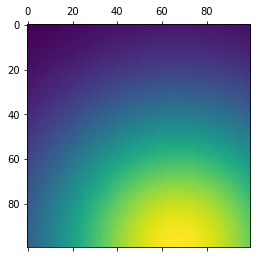

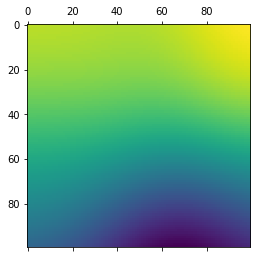

(100, 100, 3) (100, 100) [0.43067688] 0.75591475


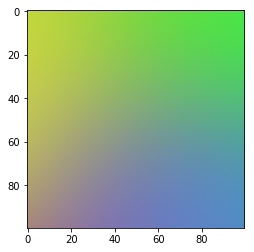

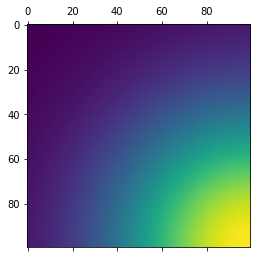

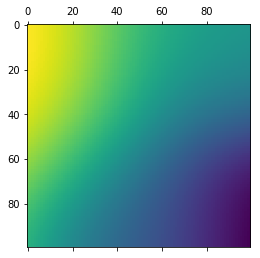

(100, 100, 3) (100, 100) [0.40977493] 0.62477124


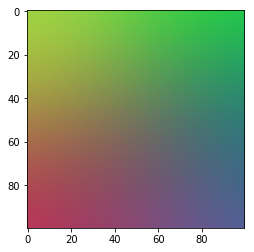

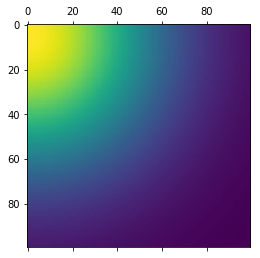

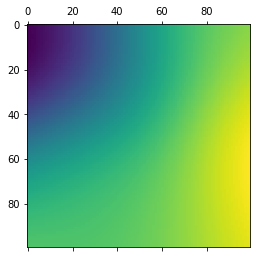

(100, 100, 3) (100, 100) [0.38988742] 0.6127148


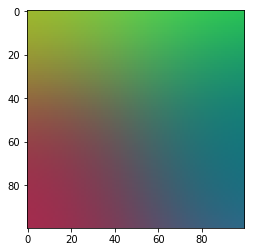

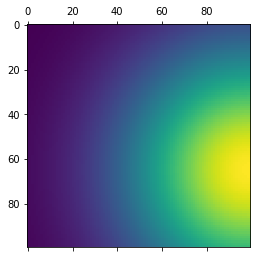

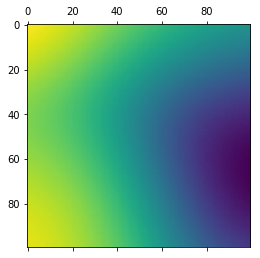

(100, 100, 3) (100, 100) [0.37096515] 0.6773568


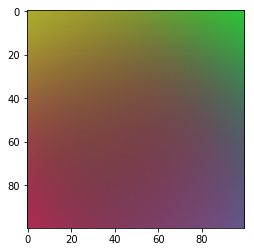

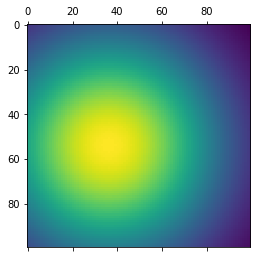

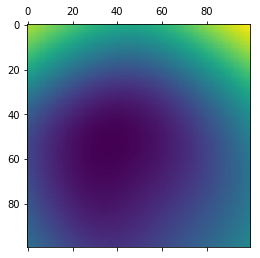

(100, 100, 3) (100, 100) [0.35296118] 0.76081157


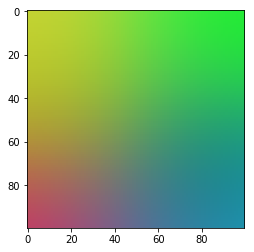

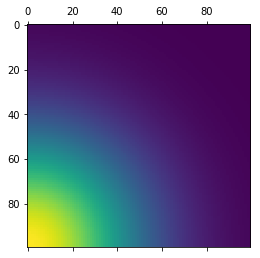

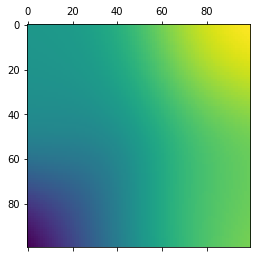

(100, 100, 3) (100, 100) [0.335831] 0.69780695


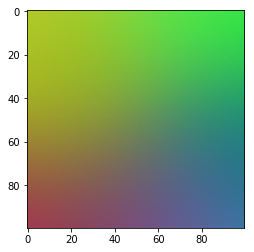

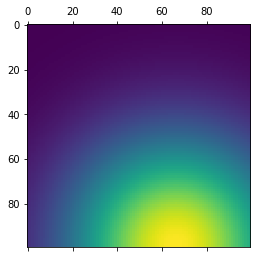

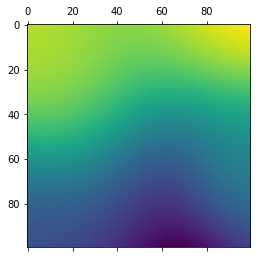

(100, 100, 3) (100, 100) [0.31953222] 0.724385


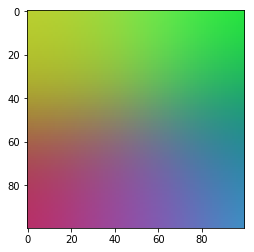

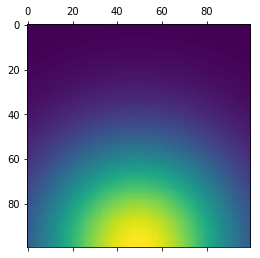

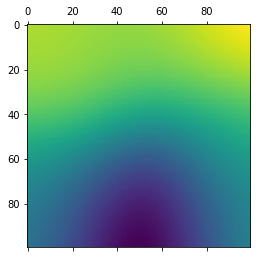

(100, 100, 3) (100, 100) [0.30402443] 0.82309073


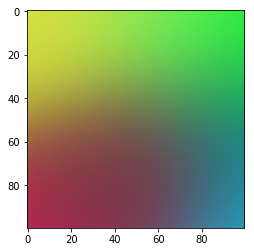

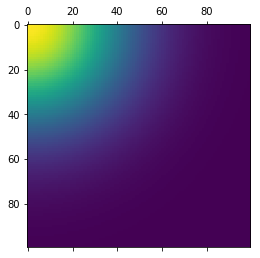

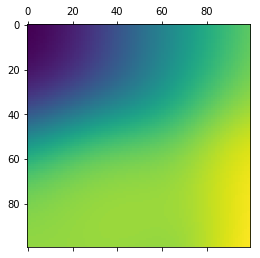

(100, 100, 3) (100, 100) [0.2892693] 0.75246996


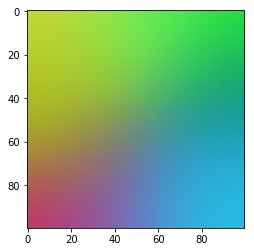

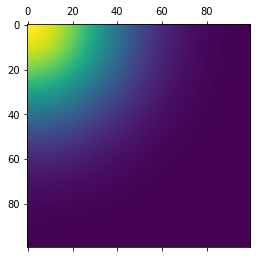

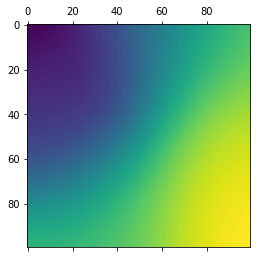

(100, 100, 3) (100, 100) [0.27523026] 0.7951592


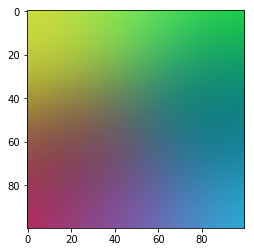

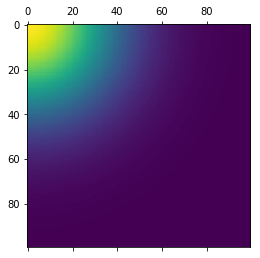

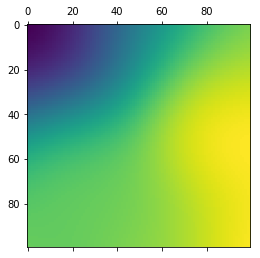

(100, 100, 3) (100, 100) [0.2618726] 0.6932515


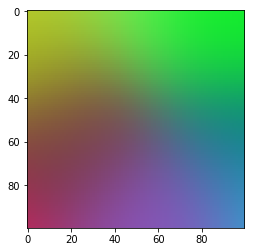

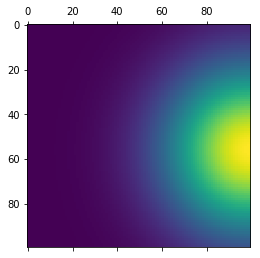

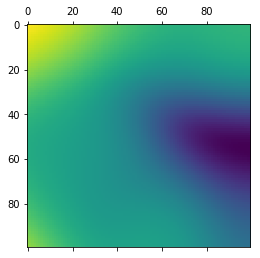

(100, 100, 3) (100, 100) [0.2491632] 0.78726405


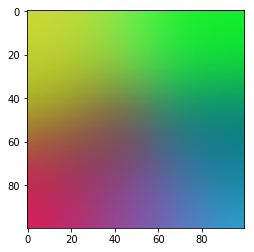

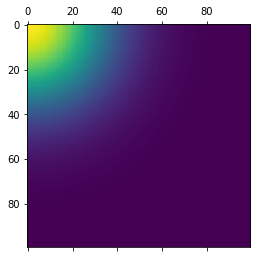

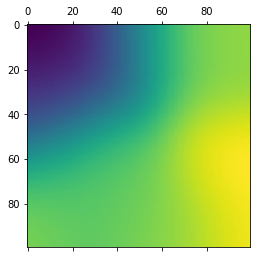

(100, 100, 3) (100, 100) [0.23707063] 0.78617895


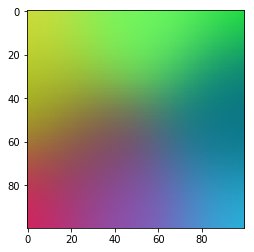

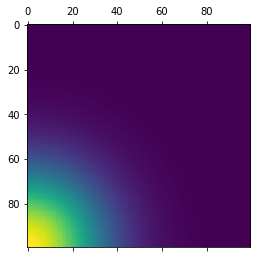

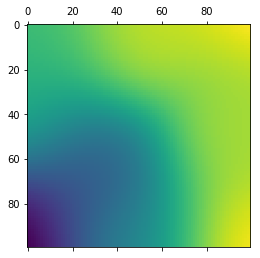

(100, 100, 3) (100, 100) [0.22556494] 0.75571907


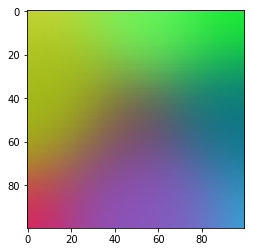

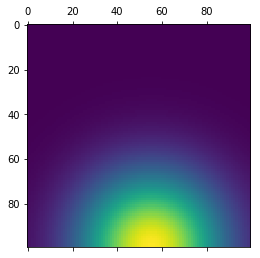

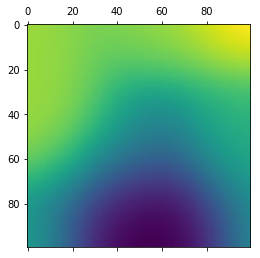

(100, 100, 3) (100, 100) [0.21461765] 0.8257479


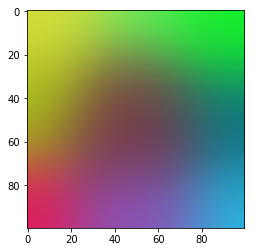

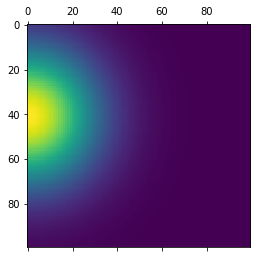

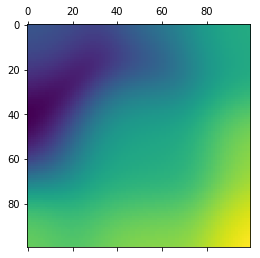

(100, 100, 3) (100, 100) [0.20420165] 0.8212994


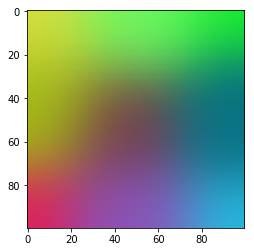

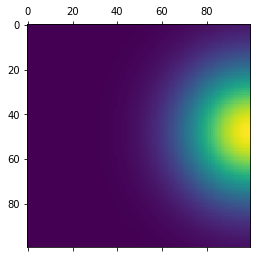

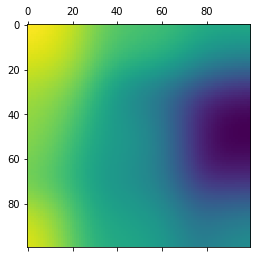

(100, 100, 3) (100, 100) [0.1942912] 0.84292984


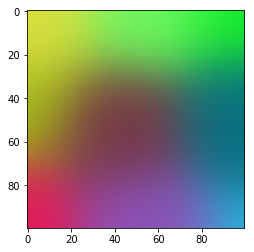

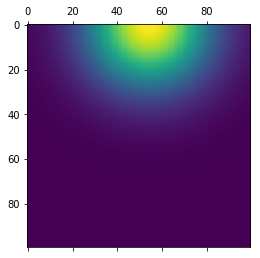

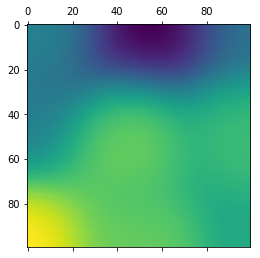

(100, 100, 3) (100, 100) [0.18486172] 0.84513295


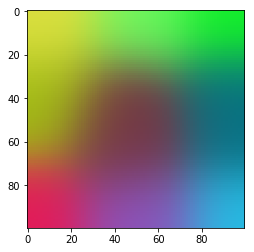

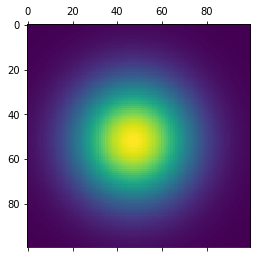

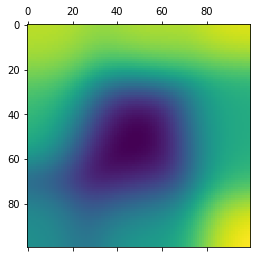

(100, 100, 3) (100, 100) [0.17588988] 0.848453


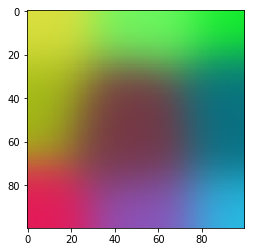

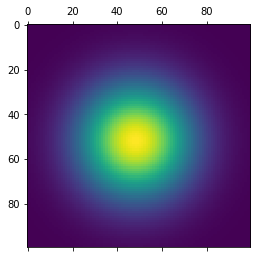

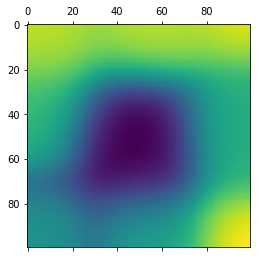

(100, 100, 3) (100, 100) [0.16735347] 0.8471791


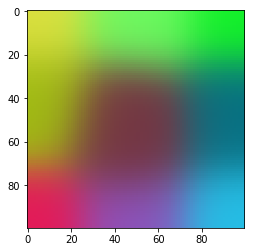

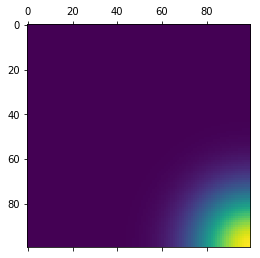

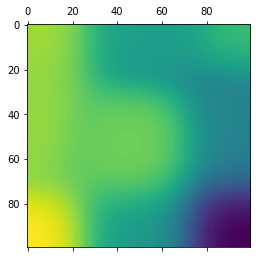

(100, 100, 3) (100, 100) [0.15923133] 0.8514381


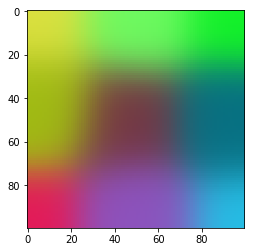

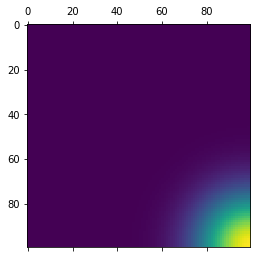

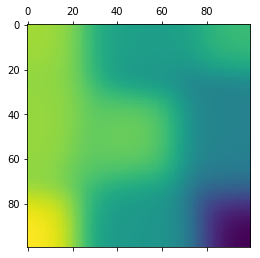

(100, 100, 3) (100, 100) [0.1515034] 0.846285


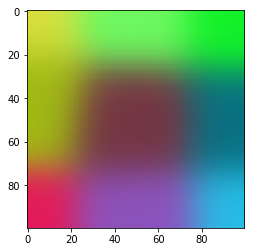

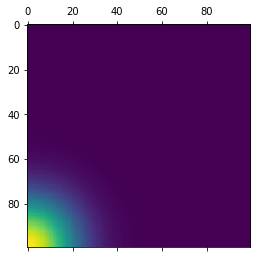

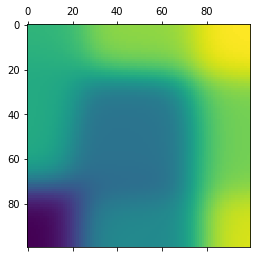

(100, 100, 3) (100, 100) [0.14415053] 0.8560618


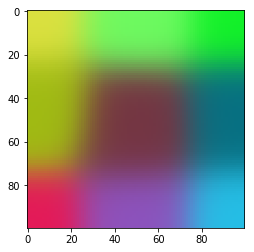

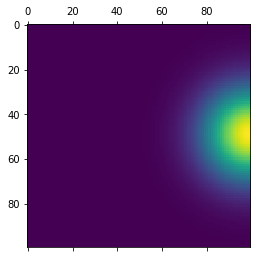

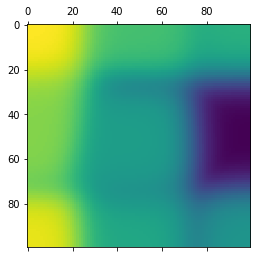

(100, 100, 3) (100, 100) [0.1371545] 0.8548704


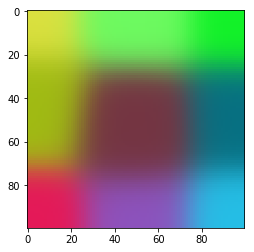

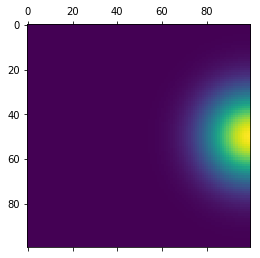

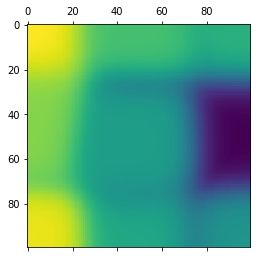

(100, 100, 3) (100, 100) [0.13049802] 0.85656375


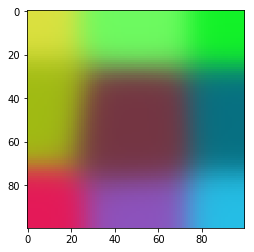

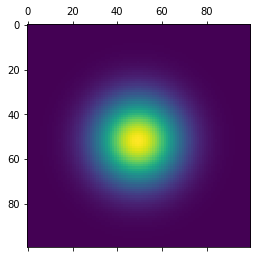

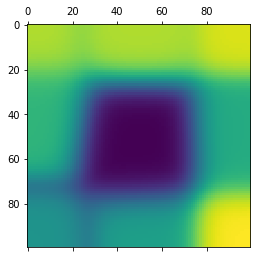

(100, 100, 3) (100, 100) [0.12416459] 0.85753036


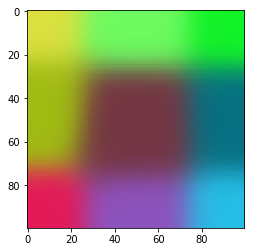

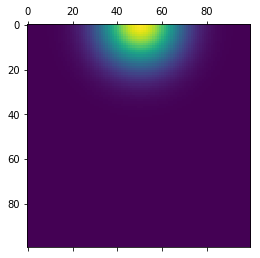

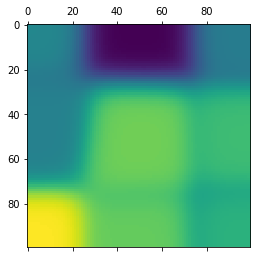

(100, 100, 3) (100, 100) [0.11813855] 0.8578683


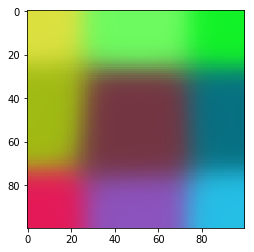

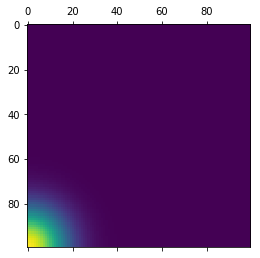

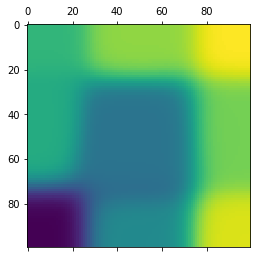

(100, 100, 3) (100, 100) [0.11240496] 0.8578439


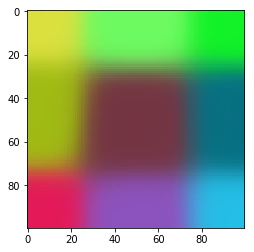

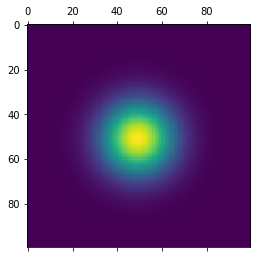

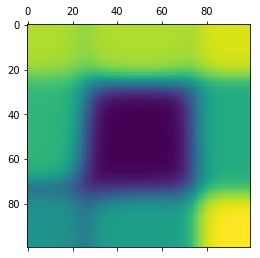

(100, 100, 3) (100, 100) [0.10694963] 0.85791093


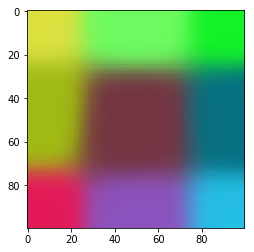

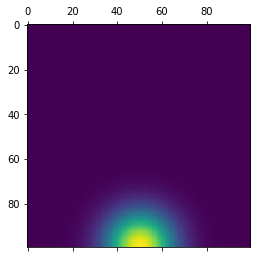

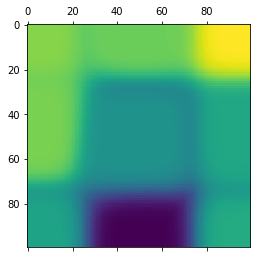

(100, 100, 3) (100, 100) [0.10175908] 0.8579506


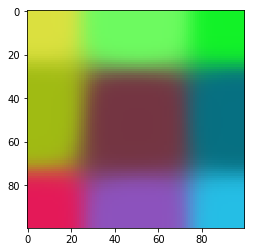

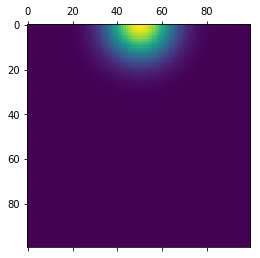

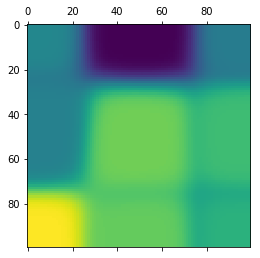

(100, 100, 3) (100, 100) [0.09682044] 0.8579599


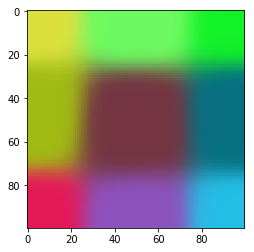

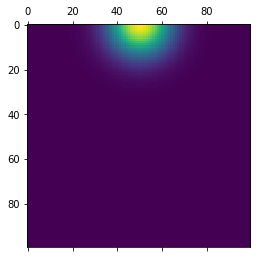

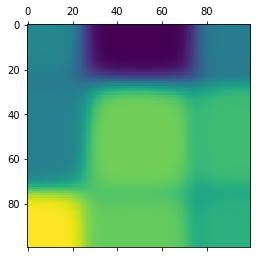

(100, 100, 3) (100, 100) [0.09212147] 0.85796183


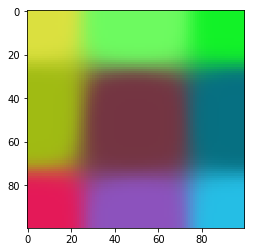

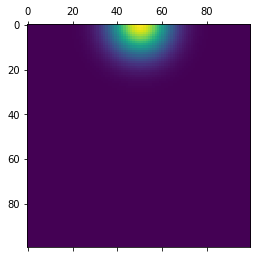

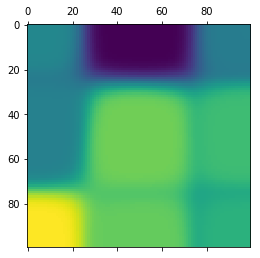

(100, 100, 3) (100, 100) [0.08765057] 0.8579624


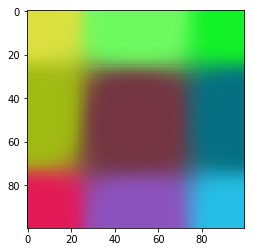

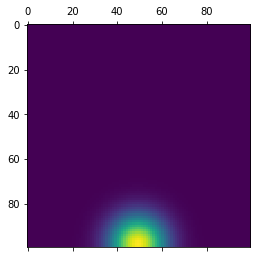

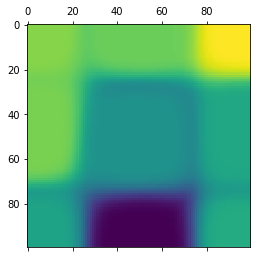

(100, 100, 3) (100, 100) [0.08339664] 0.8579624


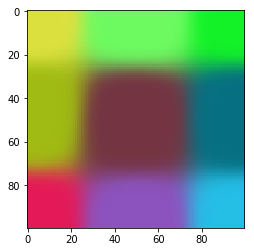

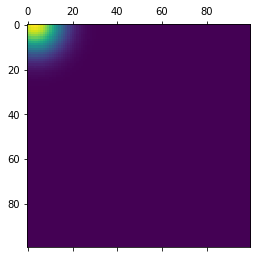

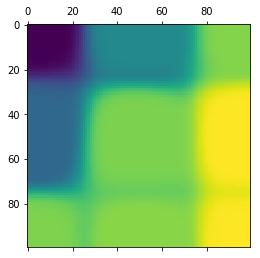

(100, 100, 3) (100, 100) [0.07934918] 0.8579624


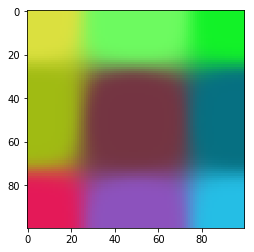

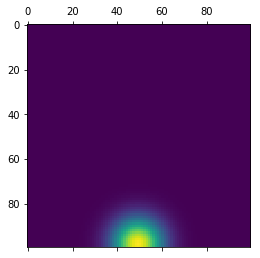

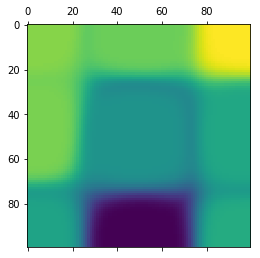

(100, 100, 3) (100, 100) [0.07549815] 0.8579624


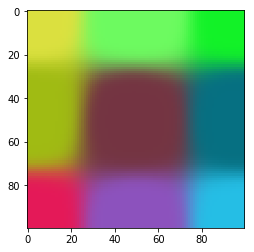

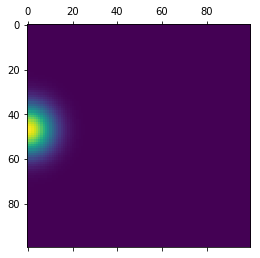

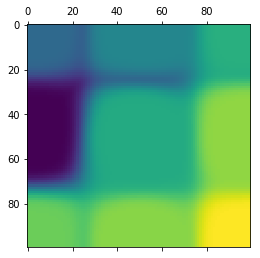

(100, 100, 3) (100, 100) [0.07183401] 0.8579624


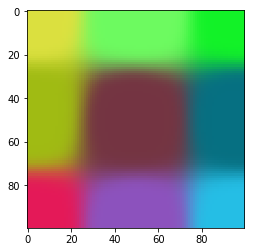

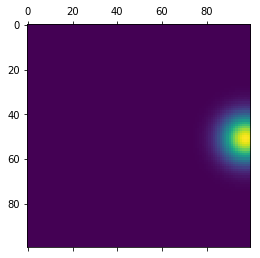

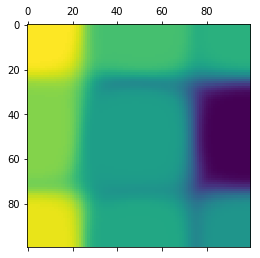

(100, 100, 3) (100, 100) [0.06834771] 0.8579624


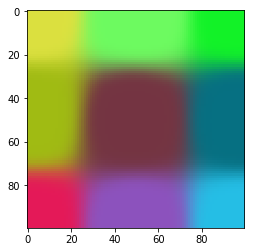

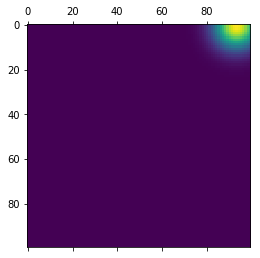

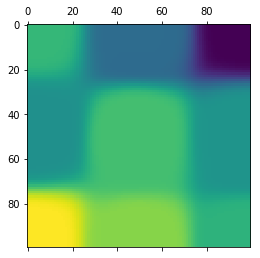

(100, 100, 3) (100, 100) [0.0650306] 0.8579624


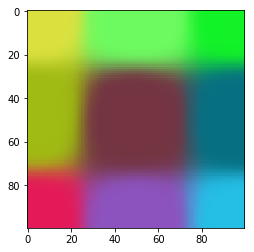

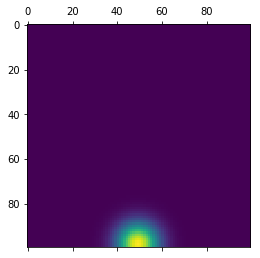

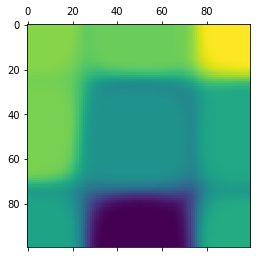

(100, 100, 3) (100, 100) [0.0618745] 0.8579624


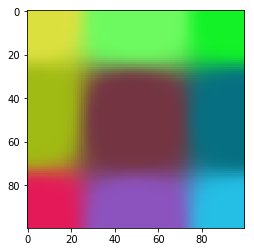

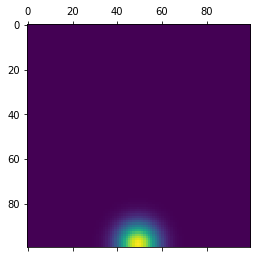

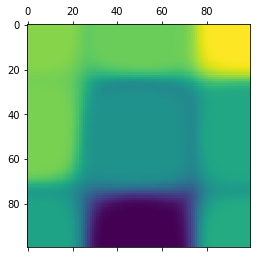

(100, 100, 3) (100, 100) [0.05887156] 0.8579624


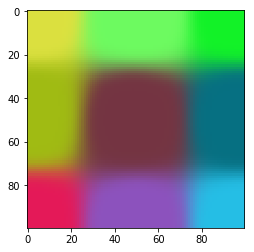

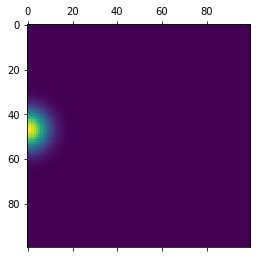

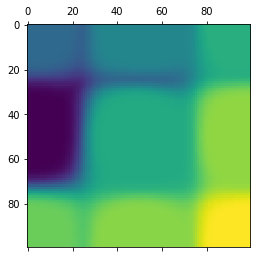

(100, 100, 3) (100, 100) [0.05601437] 0.8579624


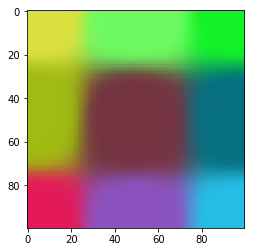

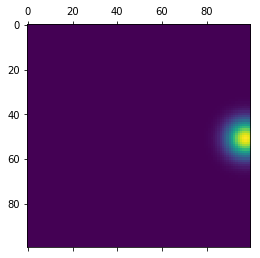

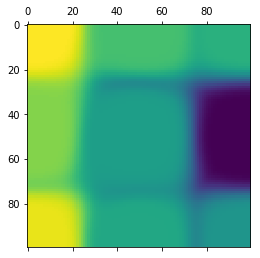

(100, 100, 3) (100, 100) [0.05329583] 0.8579624


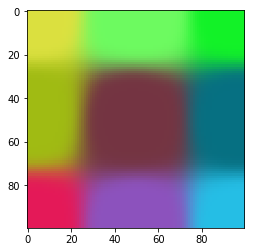

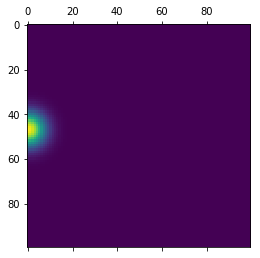

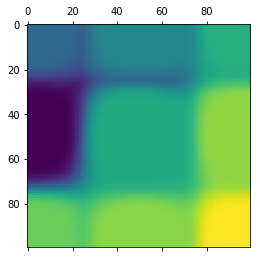

(100, 100, 3) (100, 100) [0.05070924] 0.8579624


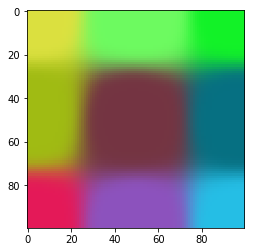

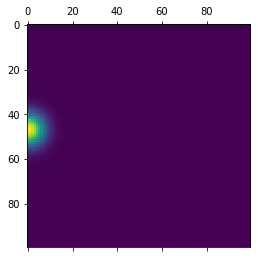

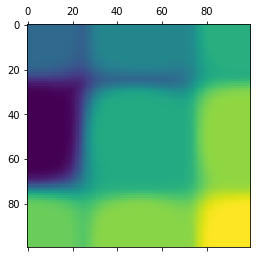

(100, 100, 3) (100, 100) [0.04824818] 0.8579624


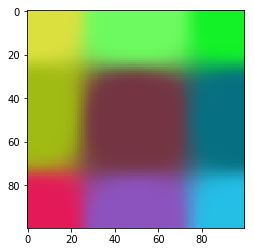

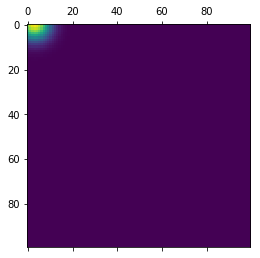

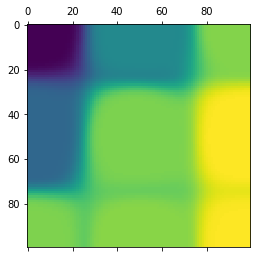

(100, 100, 3) (100, 100) [0.04590656] 0.8579624


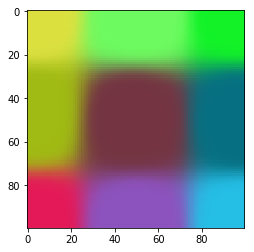

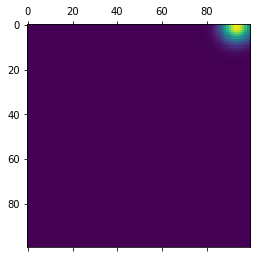

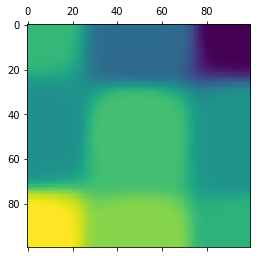

(100, 100, 3) (100, 100) [0.04367859] 0.8579624


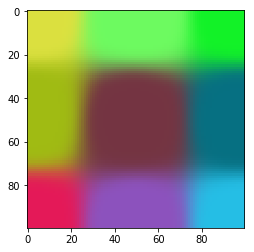

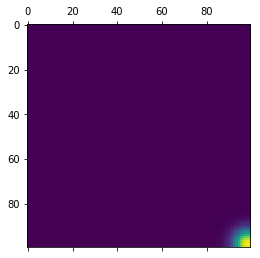

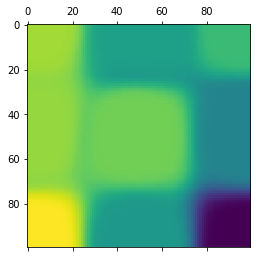

In [0]:
current_weights = np.random.rand(width, height, 3)
current_theta_t = []
current_lt = []
initial_t = 1
for j in range(1, 50):
  for i in range(1,200):
    tmp_weights = []
    last_weights = current_weights

    _, current_weights, current_theta_t, current_lt, distances = sess.run((weights_assigned, weights_updated, theta_t, learning_rate, dist), feed_dict = {input_data: learning_data[np.random.randint(0,9)], t: [initial_t], weights_last_iter: current_weights, L0: L0_value, sigma0: sigma0_value, time_const: time_const_val})

    initial_t += 1
  
  r = current_weights[:,:,0]
  g = current_weights[:,:,1]
  b = current_weights[:,:,2]

  rgbArray = np.zeros((width,height,3), 'uint8')
  rgbArray[..., 0] = r*256
  rgbArray[..., 1] = g*256
  rgbArray[..., 2] = b*256

  print(rgbArray.shape, current_theta_t[:,:,0].shape, current_lt, current_weights[0,0,0])
  img = Image.fromarray(rgbArray)
  im_array = np.asarray(img)
  plt.imshow(im_array)  
  plt.matshow(current_theta_t[:,:,0])
  plt.matshow(distances)
  plt.show()



In [0]:
# writer = tbc.get_writer()
# writer.add_graph(tf.get_default_graph())
# writer.flush()